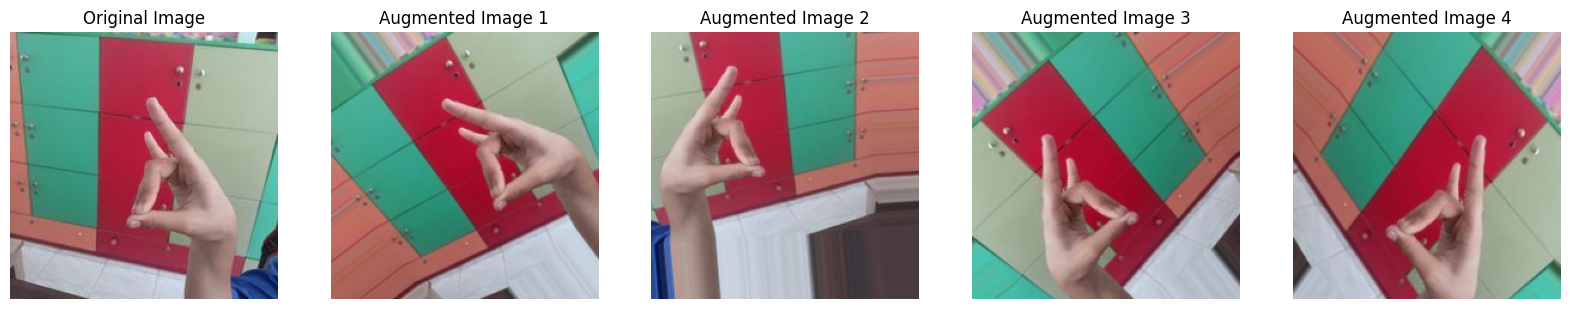

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
import os
import random
import numpy as np

# Path to your folder containing images
folder_path = 'datasets/data_aug_added/15'

# Get a random image from the folder
image_files = os.listdir(folder_path)
random_image_file = random.choice(image_files)
image_path = os.path.join(folder_path, random_image_file)

# Load the image
original_img = load_img(image_path)
img_array = img_to_array(original_img)

# Reshape image array to (1, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Prepare a batch iterator
iterator = datagen.flow(img_array, batch_size=1)

# Create a figure to display the original and augmented images
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
axes[0].imshow(array_to_img(img_array[0]))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Generate and display augmented images
for i in range(1, 5):
    augmented_img = next(iterator)[0]
    augmented_img = array_to_img(augmented_img)
    axes[i].imshow(augmented_img)
    axes[i].set_title(f'Augmented Image {i}')
    axes[i].axis('off')

plt.show()


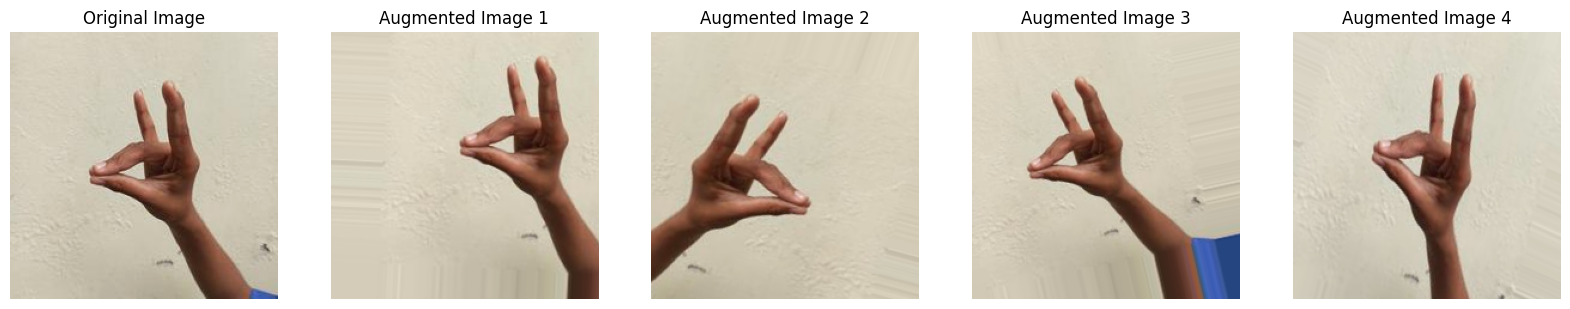

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
import os
import random
import numpy as np


# Get a random image from the folder
image_files = os.listdir(folder_path)
random_image_file = random.choice(image_files)
image_path = os.path.join(folder_path, random_image_file)

# Load the image
original_img = load_img(image_path)
img_array = img_to_array(original_img)

# Reshape image array to (1, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Prepare a batch iterator
iterator = datagen.flow(img_array, batch_size=1)

# Function to apply random contrast and brightness
def apply_random_contrast_and_brightness(image):
    contrast_factor = np.random.uniform(0.8, 1.2)  # Random contrast factor
    image = tf.image.adjust_contrast(image, contrast_factor)
    
    brightness_delta = np.random.uniform(-0.2, 0.2)  # Random brightness adjustment
    image = tf.image.adjust_brightness(image, brightness_delta)
    
    return image

# Create a figure to display the original and augmented images
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
axes[0].imshow(array_to_img(img_array[0]))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Generate and display augmented images
for i in range(1, 5):
    augmented_img = next(iterator)[0]
    augmented_img = apply_random_contrast_and_brightness(augmented_img)
    augmented_img = array_to_img(augmented_img)
    axes[i].imshow(augmented_img)
    axes[i].set_title(f'Augmented Image {i}')
    axes[i].axis('off')

plt.show()


In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Load the ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(38, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Plot model architecture and save as an image
plot_model(model, to_file='resnet50_custom_layers.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'